ANA 540 Assignment 7 Chapter 8: Dimensionality Reduction

# B3BD (Blood-Brain Barrier Database)

## Principal Component Analysis or PCA

This Jupyter Notebook is coded to run locally on your computer rather than on Colab or Kaggle.  It is analogous to the Jupyter notebook shown on the webpage https://github.com/theochem/B3DB/blob/main/notebooks/PCA_projection_descriptors.ipynb used for PCA Projection with Physiochemical Descriptors.  

Before you start  all the normal things that belong at the beginning of a program you will need to install some things you won't normally have in already installed.  Follow these directions!

First, from Anaconda open a Powershell using the link in Anaconda's Environments labeled "powershel_shortcut".  Once the powershell opens enter:

git clone https://github.com/chembl/ChEMBL_Structure_Pipeline.git  

Then enter:

conda install -c conda-forge chembl_structure_pipeline

As with all packages you install, when you are prompted Proceed ([y]/n)? Enter y!  This will get you setup for things to come.  

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline.

Just like in previous chapters, let's define the default font sizes to make the figures prettier.

In [55]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

In [56]:
# data file name for BBB dataset with categorical data
# load data

df = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\B3DB\classification_extended_test.csv', dtype = 'unicode')
df = pd.DataFrame(df)
print(df.dtypes)
df

import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

NO.              object
compound_name    object
IUPAC_name       object
SMILES           object
CID              object
                  ...  
WPol             object
Zagreb1          object
Zagreb2          object
mZagreb1         object
mZagreb2         object
Length: 1625, dtype: object


Take a look at the data

In [57]:
df.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBBpm,Inchi,threshold,reference,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,...,10.17164271,63.20101154,398.0684905,9.477821204,2428,42,144,165,9.590277778,6.097222222
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,...,10.89301016,87.03369458,520.1012472,9.287522272,4114,62,194,237,13.75694444,7.916666667
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788,-2.4,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,...,9.618402106,44.82554756,304.9104395,16.93946886,218,21,68,81,4.805555556,2.861111111
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,...,9.201198714,50.61033749,341.0309786,9.743742246,898,22,82,88,6.583333333,4.694444444
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,...,10.99233566,85.35058161,461.1685814,7.686143024,2850,74,198,254,11.22916667,6.847222222


In [58]:
df_descriptors = df.iloc[:, 12:]

df_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.71672029,16.30734256,1,0,35.28988627,2.380529705,4.761059411,35.28988627,1.260353081,4.249578285,...,10.17164271,63.20101154,398.0684905,9.477821204,2428,42,144,165,9.590277778,6.097222222
1,27.96510272,22.91502846,4,0,45.43028178,2.648849325,5.297576857,45.43028178,1.261952272,4.519811521,...,10.89301016,87.03369458,520.1012472,9.287522272,4114,62,194,237,13.75694444,7.916666667
2,10.06590388,8.92731825,0,0,16.67819428,2.425682671,4.851365342,16.67819428,1.282938022,3.505118283,...,9.618402106,44.82554756,304.9104395,16.93946886,218,21,68,81,4.805555556,2.861111111
3,13.50397853,11.61299649,0,3,23.64177155,2.237341579,4.474683159,23.64177155,1.244303766,3.806688995,...,9.201198714,50.61033749,341.0309786,9.743742246,898,22,82,88,6.583333333,4.694444444
4,27.00611635,19.95743342,1,1,43.43542618,2.7095819,5.329712755,43.43542618,1.316225036,4.477452598,...,10.99233566,85.35058161,461.1685814,7.686143024,2850,74,198,254,11.22916667,6.847222222


In [59]:
df_descriptors.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,7807,7807,7807,7807,7797,7797,7797,7797,7797,7797,...,7807,7807,7807,7807,7807,7807,7807,7807,7800,7807
unique,2361,3359,7,10,3344,3250,3256,3344,3349,3348,...,3127,3354,3341,3294,2299,148,198,381,1072,704
top,22.39397776,18.86001879,0,0,35.27529318,2.723892353,5.393211061,35.27529318,1.259831899,4.302534849,...,11.01292438,80.07854417,434.2104669,7.003394628,1670,39,140,161,11.07638889,4.944444444
freq,46,46,6583,3894,46,46,46,46,46,46,...,46,46,31,31,46,238,154,84,53,58


In [60]:
df.BBBpm.head()

0    BBB-
1    BBB-
2    BBB-
3    BBB-
4    BBB-
Name: BBBpm, dtype: object

In [61]:
# preprocessing data

# remove descriptors with more than 25 nan values
df_descriptors = df_descriptors[df_descriptors.columns[df_descriptors.isnull().sum(axis=0) <= 25]]

# fill nan with zeros
df_descriptors = df_descriptors.fillna(0, inplace=False)
#df_descriptors.info()

#Gen and list the column headings
y = (df_descriptors.columns.values)
print(*y, sep='\n')
index = pd.DataFrame(y, df_descriptors.columns.values)
index.info()

# standarize data
arr_descriptors = preprocessing.StandardScaler().fit_transform(df_descriptors.to_numpy())
arr = pd.DataFrame(arr_descriptors)
#arr.info()


arr_descriptors = pd.DataFrame(data = arr_descriptors)


ABC
ABCGG
nAcid
nBase
SpAbs_A
SpMax_A
SpDiam_A
SpAD_A
SpMAD_A
LogEE_A
VE1_A
VE2_A
VE3_A
VR1_A
VR2_A
VR3_A
nAromAtom
nAromBond
nAtom
nHeavyAtom
nSpiro
nBridgehead
nHetero
nH
nB
nC
nN
nO
nS
nP
nF
nCl
nBr
nI
nX
ATS0dv
ATS1dv
ATS2dv
ATS3dv
ATS4dv
ATS5dv
ATS6dv
ATS7dv
ATS8dv
ATS0d
ATS1d
ATS2d
ATS3d
ATS4d
ATS5d
ATS6d
ATS7d
ATS8d
ATS0s
ATS1s
ATS2s
ATS3s
ATS4s
ATS5s
ATS6s
ATS7s
ATS8s
ATS0Z
ATS1Z
ATS2Z
ATS3Z
ATS4Z
ATS5Z
ATS6Z
ATS7Z
ATS8Z
ATS0m
ATS1m
ATS2m
ATS3m
ATS4m
ATS5m
ATS6m
ATS7m
ATS8m
ATS0v
ATS1v
ATS2v
ATS3v
ATS4v
ATS5v
ATS6v
ATS7v
ATS8v
ATS0se
ATS1se
ATS2se
ATS3se
ATS4se
ATS5se
ATS6se
ATS7se
ATS8se
ATS0pe
ATS1pe
ATS2pe
ATS3pe
ATS4pe
ATS5pe
ATS6pe
ATS7pe
ATS8pe
ATS0are
ATS1are
ATS2are
ATS3are
ATS4are
ATS5are
ATS6are
ATS7are
ATS8are
ATS0p
ATS1p
ATS2p
ATS3p
ATS4p
ATS5p
ATS6p
ATS7p
ATS8p
ATS0i
ATS1i
ATS2i
ATS3i
ATS4i
ATS5i
ATS6i
ATS7i
ATS8i
AATS0dv
AATS1dv
AATS2dv
AATS3dv
AATS0d
AATS1d
AATS2d
AATS3d
AATS0s
AATS1s
AATS2s
AATS3s
AATS0Z
AATS1Z
AATS2Z
AATS3Z
AATS0m
AATS1m
AATS2m
AATS3m
AATS0v
AA

Because of the errors on 4 lines in the input dataset I pre-processed the file and fixed those lines.  There was also a problem with the column name for the "BBB/BBB-" column.  What the programmer meant by that cryptic name was BBB plus or minus.  I just renamed the column BBBpm (p for plus and m for minus).  Then it works like magic!  The devil is in the details with PCA.  Because you reduce dimensionality you are really, in this case radically reducing the number of features.  Unfortunately, the transformation strips off column names so the question is which features are you left with???

<IPython.core.display.Javascript object>


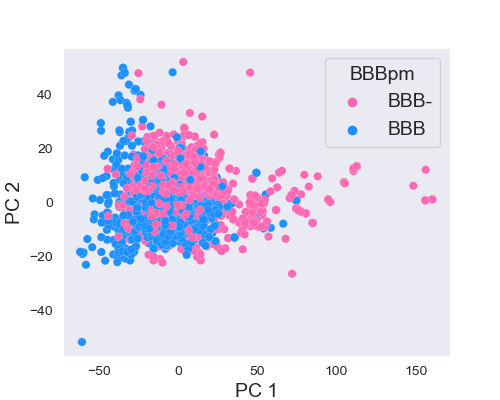

Text(0, 0.5, 'PC 2')

In [62]:

# visualization chemcial space using PCA
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))

pca = PCA(n_components=2)

#PCA fit_transform returns a ndarrary of shape (n_samples, n_components)
#the actual principal components will wind up being the last two columns of arr_embedded
arr_embedded = pca.fit_transform(arr_descriptors)

PC_1 = arr_embedded[:, 0]
PC_2 = arr_embedded[:, 1]

sns.scatterplot(data=df, x=PC_1, y=PC_2,
                hue=df.BBBpm,
                palette=sns.color_palette(["hotpink", "dodgerblue"]),
                linewidth=0.1,
                )
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
# plt.savefig("pca_projection_descriptors.png", dpi=300)

So we have a nice figure output.  I confess to me this is almost unintelligible.  

The principal components shown, PC_1 and PC_2, are the linear combinations of all the variables represented by the most dominant two eigenvalues and their corresponding eignvectors.  To understand what is going on we would have to print out what the linear combination of variables in PC_1 and PC_2 are.  We could look for the variables which are the biggest porportions of PC_1 and PC_2 and begin to understand what is going on in order to further the drug related chemical development.  But, we've seem to have stripped away that information.  

Beyond that, I can see that BBB- is right-shifted somewhat relative to BBB.  But I have no idea what BBB or BBB- represent at this time.  BBB might represent the case when "things" pass through the blood-brain barrier.  If so, again, right now I have no idea of all the variables included in this principal component or what "thing" BBB actually represents so that I could do something to prevent them from passing through this barrier, if that was desired.  Anyway, we'll move on in a moment.  First, let me provide you with a look at the numbers in PC_1 and PC_2.  

In [63]:
#I don't have the names that are associated with these principal components.  
#Remember that the original dataframe had 1625 rows.  

loadings = pd.DataFrame(pca.components_.T,columns=['PC_1', 'PC_2'])#, index = df.feature_names)
loadings

# These values represent the relative loading (or weight) of that part of the respective principal  
# components.  What I can do is sort these principal components by column to see what the largest values are.

,PC_1,PC_2
0,0.052472,-0.000612
1,0.052405,0.004787
2,0.003913,0.053828
3,0.006258,-0.016528
4,0.051973,-0.002770
...,...,...
1184,0.051303,-0.006448
1185,0.052553,-0.001529
1186,0.052089,-0.002792
1187,0.049878,0.014505


In [64]:
loadings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC_1    1189 non-null   float64
 1   PC_2    1189 non-null   float64
dtypes: float64(2)
memory usage: 18.7 KB


In [65]:
#Let's take a few minutes to see if we can get the eigenvalues for the principal components.  This should be simple enough.

df4 = pd.DataFrame(loadings.iloc[:,0:2]).sum()
df4.info()
print(df4)


<class 'pandas.core.series.Series'>
Index: 2 entries, PC_1 to PC_2
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes
PC_1    20.620244
PC_2     4.860741
dtype: float64


However, to look at the relative significance of these number you really need to look at the correlations.  

In [66]:
#Let's do two things here.  First, let's compoute the correlation coefficients of 
#the various features with the explained variance.  Second, let's add back the 
#column headings that got stripped off a long time ago.  Rmember that originally we
#had 1625 columns, then 1613, and so on.  If you copy the column headings at the correct
#point you can add them back into your result.  Now all that is left is to sort the
#results to find the highest correlation coefficient for PC1 and PC2.  

df1 = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(df1, columns = ['PC_1', 'PC_2'], index=index)
#loading_matrix

load_matrix = loading_matrix.sort_values(by=['PC_1'], ascending=False)
print(load_matrix)

load_matrix2 = loading_matrix.sort_values(by=['PC_2'], ascending=False)
print(load_matrix2)


                  PC_1      PC_2
(ATS0d,)      0.992709 -0.071304
(Xp-2d,)      0.992033  0.020842
(Zagreb1,)    0.991415 -0.013311
(TMWC10,)     0.990389 -0.009157
(ABC,)        0.989887 -0.005327
...                ...       ...
(VE2_Dzm,)   -0.772849  0.002899
(VE2_Dzpe,)  -0.777755  0.013316
(VE2_Dzare,) -0.783055  0.024060
(SM1_Dzp,)   -0.810990 -0.416249
(SM1_Dzv,)   -0.820108 -0.424775

[1189 rows x 2 columns]
                       PC_1      PC_2
(IC0,)             0.063723  0.877811
(AATS0pe,)         0.022753  0.875670
(AMID_h,)          0.018691  0.866893
(AATS0are,)        0.052982  0.861360
(ETA_dEpsilon_A,) -0.019067  0.846726
...                     ...       ...
(CIC1,)            0.578455 -0.641988
(GATS2dv,)        -0.151202 -0.644730
(AMID_C,)          0.070300 -0.791357
(AATSC1c,)        -0.051540 -0.791868
(ETA_dEpsilon_C,) -0.022250 -0.807800

[1189 rows x 2 columns]


You could plot these results.  However, I think you'll see from the correlation coefficients and the covariance loadings what features are dominant and have the highest values in the two loadings output.  You'll probably want to take time to watch the additional VoiceThreads in Module 3.  There are materials you can download there too!

What I want to do is break away from this "big data" file and go to the same but reduced dataset to look at some additional things.  You can listen to my complete description of this in the videos on dimensionality reduction on YouTube.  The reduced dataset has 208 observations of 134 variables rather than the 1613 variables or so that we used before.  

Some of the code for this section on PCA was taken from the websites https://topepo.github.io/caret/data-sets.html#blood-brain-barrier-data, https://cran.r-project.org/web/packages/caret/vignettes/caret.html, and https://rdrr.io/rforge/caret/man/BloodBrain.html#heading-3.  

In [67]:
#First read in the smaller dataset and target
dataframe = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\BBB_Data\BBB_Data.csv')
Target = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\BBB_Data\BBB_Target.csv')

array = dataframe.values
array2 = Target.values

In [68]:
dataframe.head()

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,-0.0303,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,-0.0240,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,-0.0255,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300


In [69]:
Target.head()

,Y
0,1.08
1,-0.40
2,0.22
3,0.14
4,0.69


In [70]:
X = array
Y = array2

In [71]:
pca = PCA(n_components = 2)

fit = pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.768 0.201]
[28376.143 14501.734]


How does this compare with our original results?  PC1 has an explained variance ratio of about 77% now.  Originally, PC1 had an explained variance ratio of over 99%.  First, I tried scaling the data but that reduced the explained variance ratio even further.  My best guess is that we've left something out of our smaller dataset that is important.  This is where it is really important to have that subject matter expert (SME) engaged.

## Feature Selection

Let's look at the Pima Indian Diabetes dataset for this again.  We first looked at it in the videos about dimensionality reduction.  Now, let's see what we get using a recursive feature elimination program on these data.  Some of the code and other information was taken from the websites https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download, https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_data_feature_selection.htm, https://ugoproto.github.io/ugo_py_doc/feature_selection_in_python/#a-feature-selection-case, 

In [72]:
#Read in the data
dataframe = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\Pima_Indians\diabetes.csv')

#Note that reading in these data into "datagrame" will write over the previous data for the Blood-Brain Barrier.
dataframe.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1


In [73]:
#For efficiency rename the variables as follows:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe.columns = names
dataframe.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1


In [74]:
dataframe.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [75]:
#To invoke Numpy computations, convert the dataframe to a Numpy array
array=dataframe.values

#Segrate the independent variables from the target variable
X = array[:,0:8]
y = array[:,8]

In [76]:
#To do the actual feature selection we'll use a Chi-squared test in the sklearn.feature_selection SelectKBest
#package as follows
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [77]:
#Do the actual feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [78]:
#Consider the output
np.set_printoptions(precision=3)

print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.38   181.304]


In [79]:
#The "k" highest scores will be the variables (features) selected by the program to keep
#View a table of values
pd.DataFrame({'names' : names[0:8], 'scores' : fit.scores_})

,names,scores
0,preg,111.519691
1,plas,1411.887041
2,pres,17.605373
3,skin,53.108040
4,test,2175.565273
5,mass,127.669343
6,pedi,5.379986
7,age,181.303689


Given these values the k=4 features selected will be: plas, test, mass, and age.  You can take this further by looking at individual values that comprise the total for these features.  Let's look at these same packages but implementing recursive feature elimination.  

## Recursive Feature Elimination

Now rather than selecting the "best" features, we'll remove features recursively until we have k remaining features or attributes.  But first, we'll look at some EDA which we should have done to begin with.  I've taken some of the code from the websites https://www.kaggle.com/code/josemaria2/diabetes-prediction-feature-engineering-rfe, https://www.kaggle.com/code/rab5786/pima-indians-diabetes-prediction, https://www.kaggle.com/code/lena0104/feature-selection, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html, and https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b.  Initially, values at the website https://www.kaggle.com/code/josemaria2/diabetes-prediction-feature-engineering-rfe differed from those I got, for example the website showed the highest correlation values to be 0.64 and 0.65.  The highest correlation values I got were 0.54 for the correlation between pregnancies and age.  This is the same value that this website got for this combination of variables... strange! Or, not so strange.  After I had substituted for all the 0 values I did get the same correlation values as the website.  

In [80]:
#Make sure to use commands required for reproducible research
import random
random.seed(234)

#In this case we'll set k=3 and use logistic regression in the recursive feature elimination

import seaborn as sbn
sbn.set_style("dark")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression    
    
array = dataframe.values

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
dataframe.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1


In [82]:
dataframe.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [83]:
#Use the dataframe to do some EDA and data cleaning
df_X = dataframe.drop(["class"], axis = 1)
df_y = dataframe["class"]

#Split out the target variable from the independent numeric variables
X = array[:,0:8]
y = array[:,8]

In [84]:
df_X.dtypes

preg      int64
plas      int64
pres      int64
skin      int64
test      int64
mass    float64
pedi    float64
age       int64
dtype: object

In [85]:
#What are the statistics for the independent variables?
df_X.describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.472396,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331242,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Based on these values we will have to do some scaling at some point.  

In [86]:
#Now do some data cleaning
for col in df_X.columns:
    if np.min(df_X[col]) == 0:
        print("Number of rows within {} with zero values {}".format(col, df_X[df_X[col] == 0].shape[0]))

Number of rows within preg with zero values 111
Number of rows within plas with zero values 5
Number of rows within pres with zero values 35
Number of rows within skin with zero values 227
Number of rows within test with zero values 374
Number of rows within mass with zero values 11


So this is a problem.  And, we cannot just remove hundreds of observations, e.g. the test variable with 374 rows containing a zero value.  

We must make some kind of substitution.  We could compute the mean or find the median values and use those.  However, we'll use the KNNImputer from sklearn and substitute the mean value of the K-nearest neighbors.  Before we can use the imputer we have to substitute a text phrase, e.g. NaN for the 0's.  

In [87]:
#The following columns capture the variables with a problem
columns = ["plas", "pres", "skin", "test", "mass"]
for i in range(X.shape[0]):
    for col in columns:
        if df_X[col].iloc[i] == 0:
            df_X[col].iloc[i] = np.nan

C:\Users\McDaniel\AppData\Local\Temp\ipykernel_24396\3097169556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[col].iloc[i] = np.nan


In [88]:
#We have split out the target variable from the independent variables and stored them in Numpy arrays as X and y
#We have the original Pandas dataframes as df_X and df_y
#the imputer works on Numpy arrays

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10, weights = 'distance')
df_X_trans = pd.DataFrame(data = imputer.fit_transform(df_X), columns = df_X.columns)


In [89]:
#Check the variables for zero values again
#df_Xtrans = pd.DataFrame(Xtrans)
for col in df_X_trans.columns:
    if np.min(df_X_trans[col]) == 0:
        print("Number of rows within {} with zero values {}".format(col, df_X_trans[df_X_trans[col] == 0].shape[0]))

Number of rows within preg with zero values 111


Now only the variable preg has any zero values.  It certainly would not be uncommon for a woman to not have had any children or not yet.

<IPython.core.display.Javascript object>


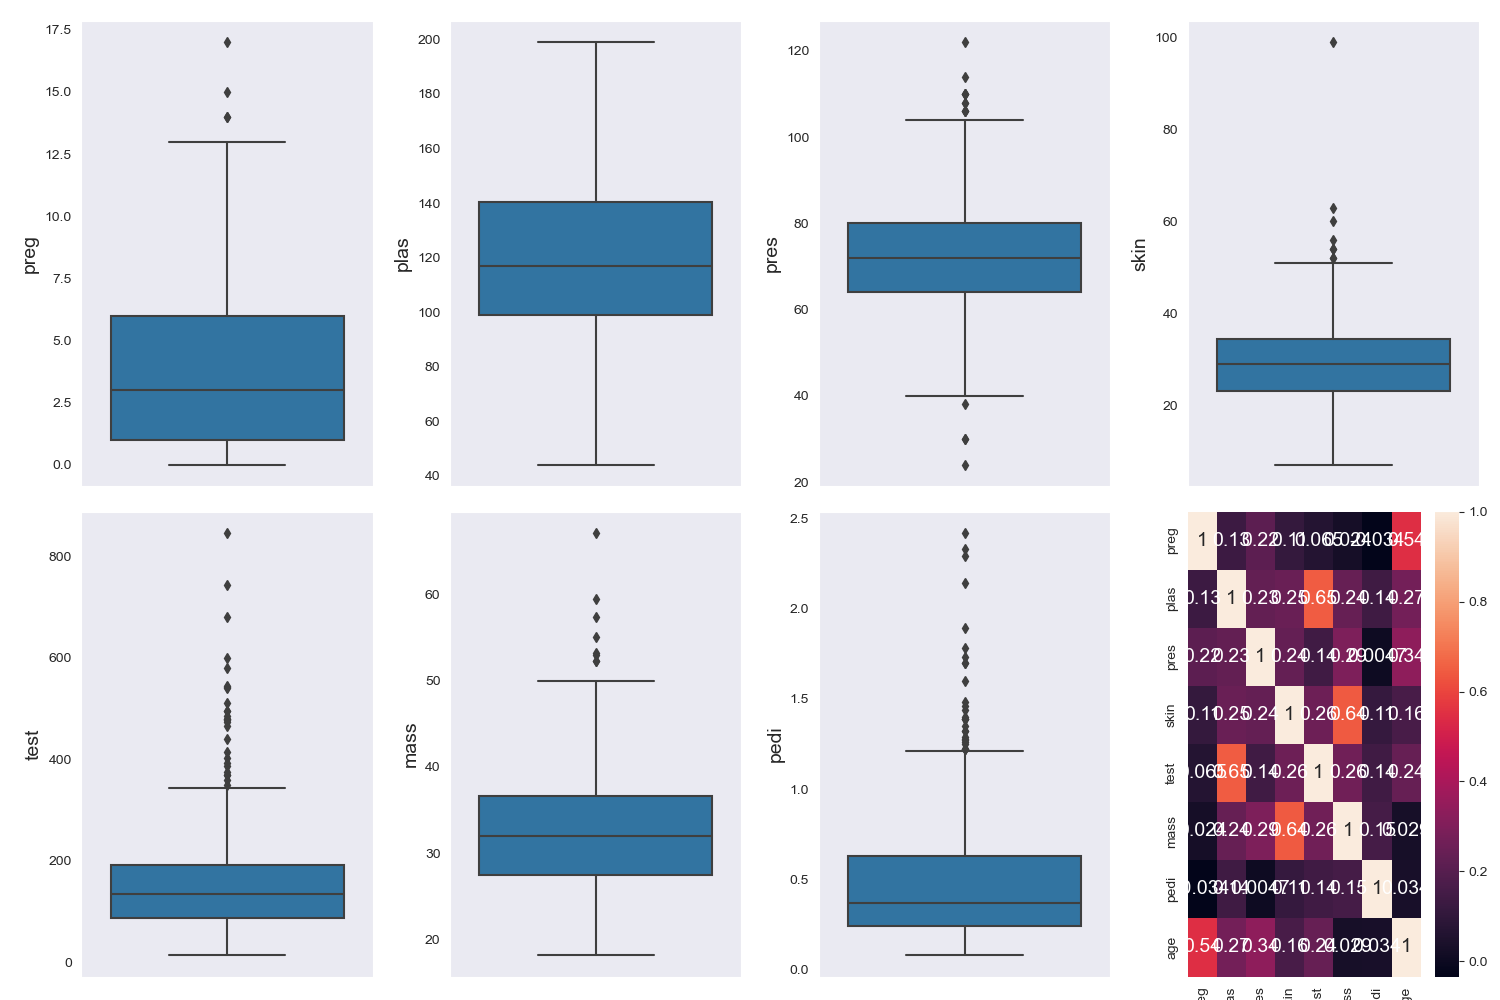

In [90]:
#Next we'll look for any outliers

fig, axes = plt.subplots(2,4, figsize = (15,10), squeeze = False)
for i, col in enumerate(df_X_trans.columns):
    plt.subplot(2,4,i+1)
    sbn.boxplot(y = df_X_trans[col].values, data = df_X_trans)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

From the boxplots it looks like we have a lot of outliers to deal with.  We'll do that through a pipeline.  Next, let's look at the correlations between variables.  

In [91]:
sbn.heatmap(df_X_trans.corr(method = 'pearson'), annot = True)

<AxesSubplot:>

We'll follow the website https://www.kaggle.com/code/josemaria2/diabetes-prediction-feature-engineering-rfe lead and not drop any features based on correlation values.  Remember that the rule of thumb is to drop any that are greater than 0.75.  

Now we could remove outliers, i.e. values that are more than 1.5 times the IQR.  To do this, using the example I was following, you need to have both TensorFlow and keras installed.  I've worked on installing them for 3 days now and am not finished.  So, we'll skip the section on removing outliers.  If you want to do this in the future, the code is at https://www.kaggle.com/code/josemaria2/diabetes-prediction-feature-engineering-rfe.    

In [92]:
#get the required packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [93]:
#Now do the recursive feature elimination with logistic regression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3, step=1)
fit = rfe.fit(X, y)

# Summarizing the selection of the attributes
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [94]:
# Alternative view
pd.DataFrame({'names': names[0:8], 'selected': fit.support_, 'ranking': fit.ranking_})

,names,selected,ranking
0,preg,True,1
1,plas,False,2
2,pres,False,4
3,skin,False,6
4,test,False,5
5,mass,True,1
6,pedi,True,1
7,age,False,3


Go back and check the results of the feature selection (elimination) before.  You'll see that the results are not the same.  The online questions will ask you how you would determine which method provided better results.  If you don't know what you would do ask for some help!  